# Speech Recognition
- Thanat Lapthawan ID:60070701605


Distance: https://dtaidistance.readthedocs.io
<br>Script to record audio: https://gist.github.com/mabdrabo/8678538
## 1. Import the required library

In [1]:
from python_speech_features import mfcc
import scipy.io.wavfile as wav
from dtaidistance import dtw_ndim

import pyaudio
import wave
import numpy as np
import pandas as pd
import IPython 
import seaborn as sns
%matplotlib inline

## Record Sound Function

We have to record both template file and the sound that we want to recognise

### Show Record Device list 

In [5]:
# Show Record Device list 

device_index = 2

info = audio.get_host_api_info_by_index(0)
numdevices = info.get('deviceCount')
for i in range(0, numdevices):
        if (audio.get_device_info_by_host_api_device_index(0, i).get('maxInputChannels')) > 0:
            print("Input Device id ", i, " - ", audio.get_device_info_by_host_api_device_index(0, i).get('name'))


Input Device id  0  -  Built-in Microphone


### Select Device from list above

In [6]:
index = int(input())
print("recording via index "+str(index))

 0


recording via index 0


### Recording

In [61]:
# name a output file
output_file_name = "file2.wav"
print("file name now set to: %s"%output_file_name)

file name now set to: file2.wav


In [64]:
# define record function
def record_sound(output_file_name = 'file.wav'):
    
    # define varialbe
    FORMAT = pyaudio.paInt16
    CHANNELS = 1
    RATE = 16000
    CHUNK = 512
    RECORD_SECONDS = 3

    audio = pyaudio.PyAudio()
    
    stream = audio.open(format=FORMAT, 
                        channels=CHANNELS,
                        rate=RATE, 
                        input=True,
                        input_device_index = index,
                        frames_per_buffer=CHUNK)
    print("recording...")
    frames = []
    for i in range(0, int(RATE / CHUNK * RECORD_SECONDS)):
        data = stream.read(CHUNK)
        frames.append(data)
    print("stop recording")

    stream.stop_stream()
    stream.close()
    audio.terminate()

    # Save to WAV file
    waveFile = wave.open(output_file_name, 'wb')
    waveFile.setnchannels(CHANNELS)
    waveFile.setsampwidth(audio.get_sample_size(FORMAT))
    waveFile.setframerate(RATE)
    waveFile.writeframes(b''.join(frames))
    waveFile.close()
    
    print('-- Record file successful --')

In [65]:
record_sound(output_file_name)
IPython.display.Audio(output_file_name)

recording...
stop recording
-- Record file successful --


## 3. Read template speech data

In [50]:
def read_speech_feature(filename):
    (rate,sig) = wav.read(filename)
    features = mfcc(sig,rate)
    return rate,sig,features

In [51]:
rate_yes1,sig_yes1, mfcc_feat_yes1 = read_speech_feature(filename="yes1.wav")
rate_yes2,sig_yes2, mfcc_feat_yes2 = read_speech_feature(filename="yes2.wav")
rate_no1,sig_no1, mfcc_feat_yes1 = read_speech_feature(filename="no1.wav")
rate_no2,sig_no2, mfcc_feat_yes1 = read_speech_feature(filename="no2.wav")

### Define a speech template

In [58]:
template_speech_feat = [mfcc_feat_yes1, mfcc_feat_yes2, mfcc_feat_no1, mfcc_feat_no2]
label = ['yes','yes','no','no']

## 4. Define DTW Function

In [59]:
def recognition_dtw(mfcc_input, template_speech_feat, template_label):
    
    speech_feature_list = [mfcc_input] + template_speech_feat
    d = np.round(dtw_ndim.distance_matrix(speech_feature_list),2)[0,1:]
    res = pd.DataFrame({'y':template_label, 'd':d})

    # calculate distance as weight 
    res['weight'] = 1/(res['d']**2)

    # scale weight as the contribution score
    res['weight_scaled'] = res['weight']/sum(res['weight'])

    # rank the score and pick the top one
    pred_res = res.groupby('y').agg(sum).sort_values(by='weight_scaled',ascending=False).index[0]

    print("The system detect word: %s"%pred_res)

## 5. Recognition using DTW
### 5.1 Speech file to recognise

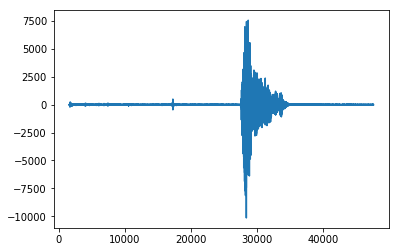

In [67]:
# Read file
[rate, sig] = wav.read('file2.wav')
sns.lineplot(x=np.arange(1600,sig.shape[0]),y=sig[1600:])
mfcc_input = mfcc(sig[1600:],rate)

### 5.2 Applied function

In [68]:
recognition_dtw(mfcc_input, template_speech_feat, template_label=label)

The system detect word: yes
